In [1]:
import tv_proximal
import torch
import matplotlib.pyplot as pp
import timeit

In [2]:
m = 128
n = 128
b = 64
x = torch.ones( ( b, m, 2 * n ), dtype = torch.float32, device = 'cuda' )
x[ :, m / 4 : 3 * m / 4, 2 * n / 4 : 2 * 3 * n / 4 ] += 1.0
x += 0.1 * torch.randn( ( b, m, 2 * n ), dtype = torch.float32, device = 'cuda' )

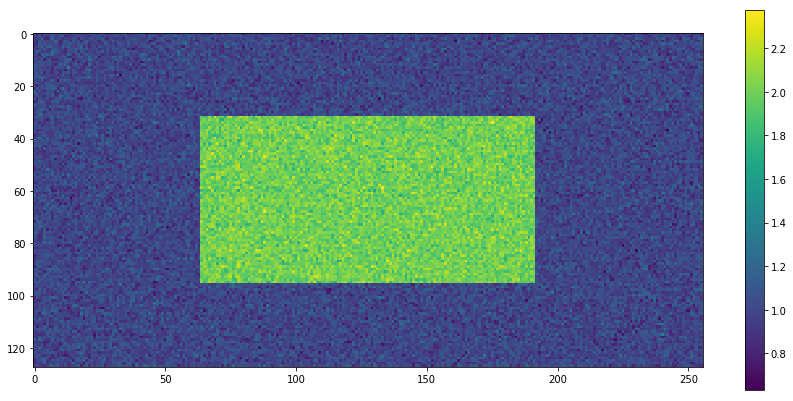

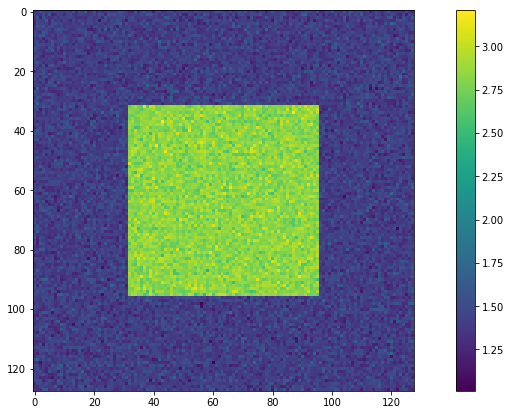

In [3]:
pp.figure( figsize = ( 15, 7 ) )
pp.imshow( x[ b / 2, :, : ] )
pp.colorbar()
pp.show()
tmp = torch.sqrt( x[ :, :, : : 2 ] ** 2 + x[ :, :, 1 : : 2 ] ** 2 )
pp.figure( figsize = ( 15, 7 ) )
pp.imshow( tmp[ b / 2, :, : ] )
pp.colorbar()
pp.show()

In [4]:
( p, q ) = tv_proximal.L_transpose( x )

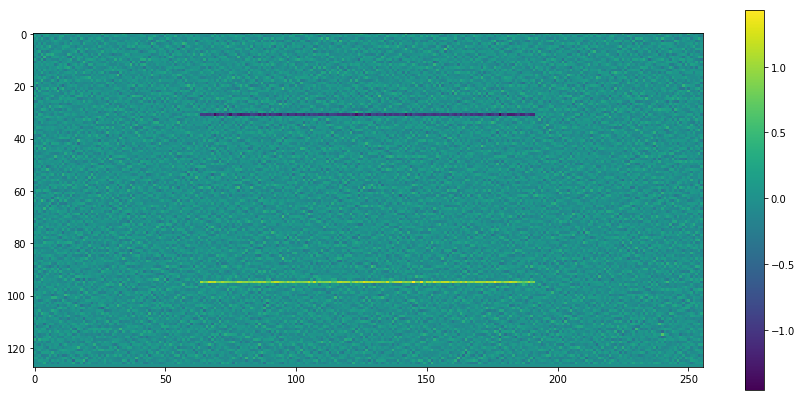

In [5]:
pp.figure( figsize = ( 15, 7 ) )
pp.imshow( p[ b / 2, :, : ] )
pp.colorbar()
pp.show()

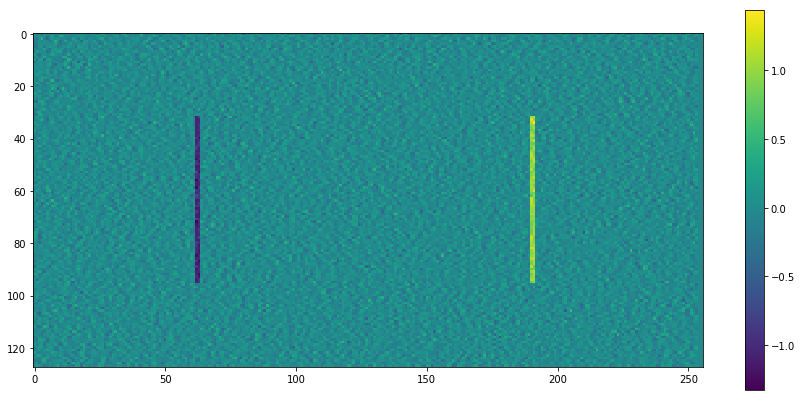

In [6]:
pp.figure( figsize = ( 15, 7 ) )
pp.imshow( q[ b / 2, :, : ] )
pp.colorbar()
pp.show()

In [7]:
x_prime = tv_proximal.L( p, q )

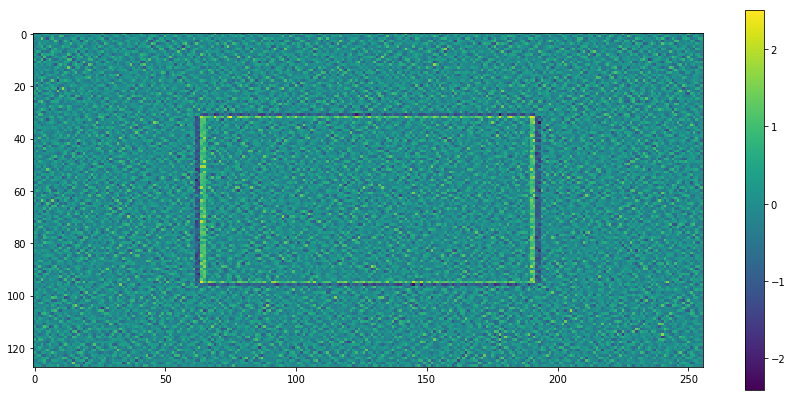

In [8]:
pp.figure( figsize = ( 15, 7 ) )
pp.imshow( x_prime[ b / 2, :, : ] )
pp.colorbar()
pp.show()

In [9]:
( r, s ) = tv_proximal.projection( p, q )

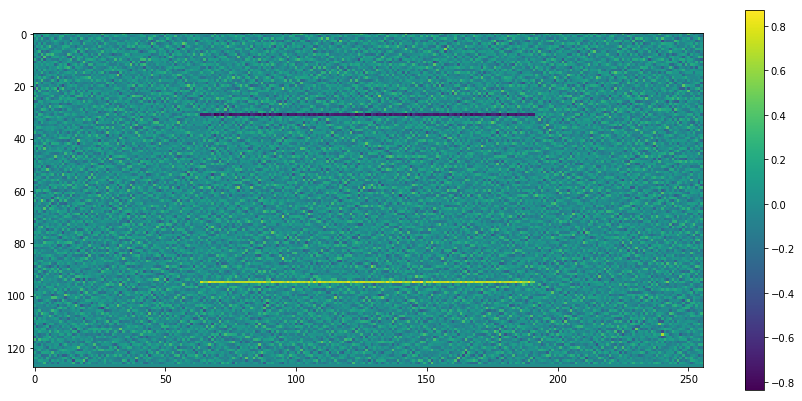

In [10]:
pp.figure( figsize = ( 15, 7 ) )
pp.imshow( r[ b / 2, :, : ] )
pp.colorbar()
pp.show()

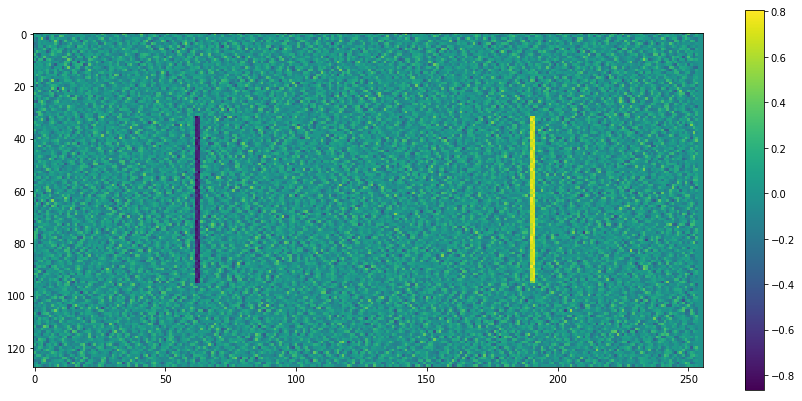

In [11]:
pp.figure( figsize = ( 15, 7 ) )
pp.imshow( s[ b / 2, :, : ] )
pp.colorbar()
pp.show()

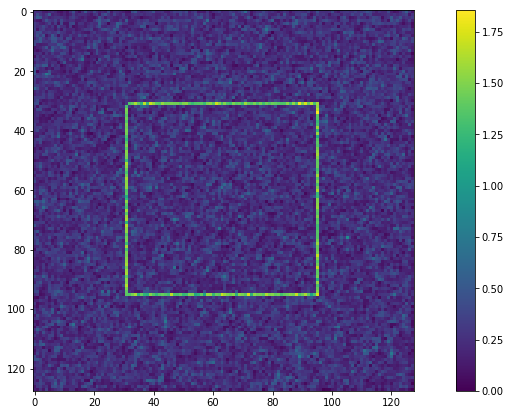

In [12]:
tmp = torch.sqrt( p[ :, :, : : 2 ] ** 2 + p[ :, :, 1 : : 2 ] ** 2 +
                  q[ :, :, : : 2 ] ** 2 + q[ :, :, 1 : : 2 ] ** 2
                )
pp.figure( figsize = ( 15, 7 ) )
pp.imshow( tmp[ b / 2, :, : ] )
pp.colorbar()
pp.show()

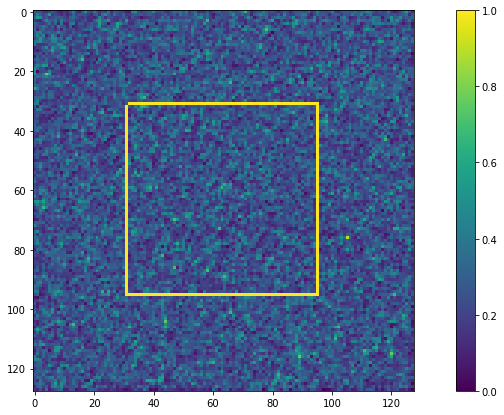

In [13]:
tmp = torch.sqrt( r[ :, :, : : 2 ] ** 2 + r[ :, :, 1 : : 2 ] ** 2 +
                  s[ :, :, : : 2 ] ** 2 + s[ :, :, 1 : : 2 ] ** 2
                )
pp.figure( figsize = ( 15, 7 ) )
pp.imshow( tmp[ b / 2, :, : ] )
pp.colorbar()
pp.show()

In [52]:
#x_den = tv_proximal.denoise( x, 0.25, 300 )
x_den = tv_proximal.denoise( x, 1.0, 300 )

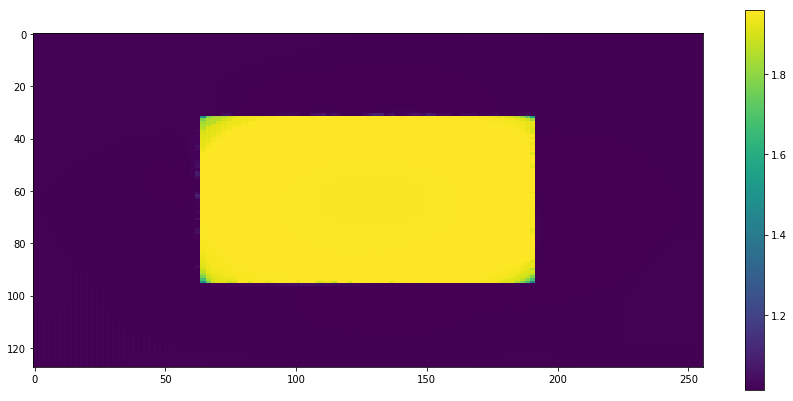

In [53]:
pp.figure( figsize = ( 15, 7 ) )
pp.imshow( x_den[ b / 2, :, : ] )
pp.colorbar()
pp.show()

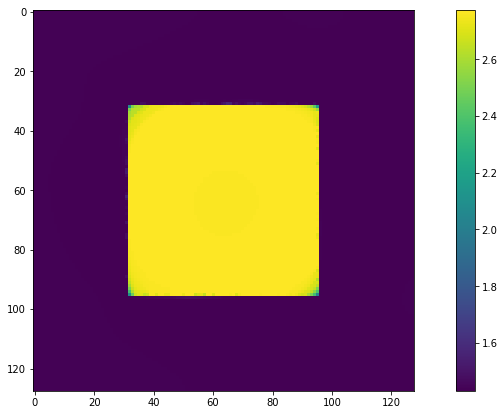

In [54]:
tmp = torch.sqrt( x_den[ :, :, : : 2 ] ** 2 + x_den[ :, :, 1 : : 2 ] ** 2 )
pp.figure( figsize = ( 15, 7 ) )
pp.imshow( tmp[ b / 2, :, : ] )
pp.colorbar()
pp.show()

In [57]:
initialization = """import tv_proximal
import torch
import matplotlib.pyplot as pp
import timeit
m = 128
n = 128
b = 64
x = torch.ones( ( b, m, 2 * n ), dtype = torch.float32, device = 'cuda' )
x[ :, m / 4 : 3 * m / 4, 2 * n / 4 : 2 * 3 * n / 4 ] += 1.0
x += 0.1 * torch.randn( ( b, m, 2 * n ), dtype = torch.float32, device = 'cuda' )"""

number = 100
print timeit.timeit( setup = initialization,
                     stmt = "x_den = tv_proximal.denoise( x, 1.0, 50 )",
                     number = number
                   ) / number

0.0803464198112
